In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
# Tentukan path dataset
dataset_path = '/content/drive/MyDrive/semaphore'

Classes:  ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
A: 53 gambar
B: 34 gambar
C: 10 gambar
D: 10 gambar
E: 11 gambar
F: 8 gambar
G: 12 gambar
H: 6 gambar
I: 6 gambar
J: 8 gambar
K: 12 gambar
L: 16 gambar
M: 10 gambar
N: 10 gambar
O: 7 gambar
P: 9 gambar
Q: 13 gambar
R: 9 gambar
S: 10 gambar
T: 8 gambar
U: 10 gambar
V: 10 gambar
W: 9 gambar
X: 8 gambar
Y: 13 gambar
Z: 10 gambar


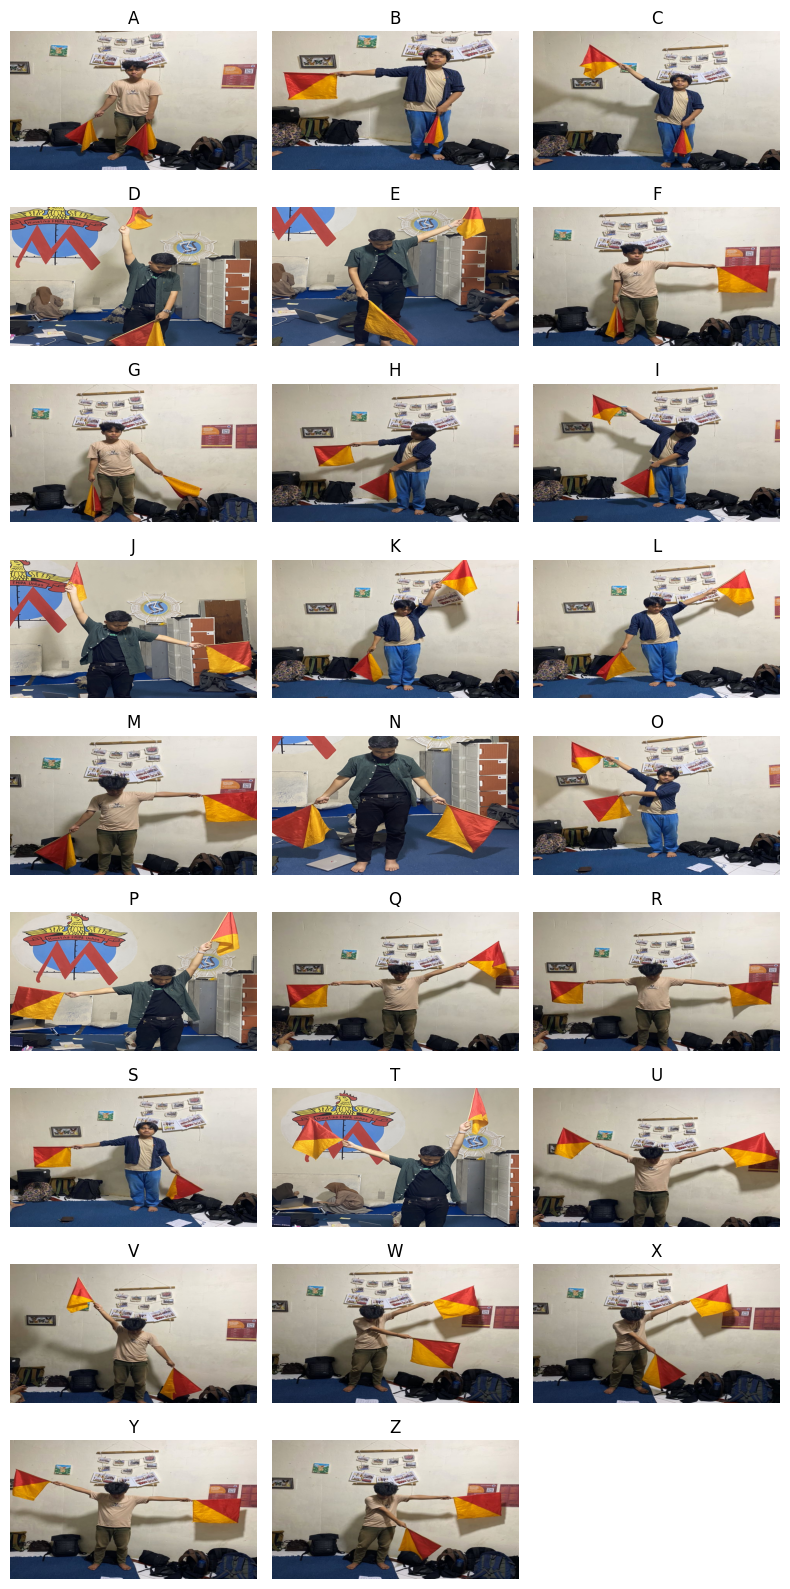

In [17]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Menampilkan kelas dalam dataset dan mengurutkan dari a sampai z
classes = sorted(os.listdir(dataset_path))  # Mengurutkan kelas secara alfabetis
print("Classes: ", classes)

# Menampilkan jumlah gambar dalam setiap kelas
for cls in classes:
    class_path = os.path.join(dataset_path, cls)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        print(f"{cls}: {num_images} gambar")
    else:
        print(f"{cls} is not a directory, skipping.")

# Mengatur ukuran figure untuk menampilkan gambar yang lebih jelas
plt.figure(figsize=(8, 16))

# Menentukan jumlah kolom untuk grid, misalnya 3 gambar per baris
num_cols = 3
num_rows = (len(classes) + num_cols - 1) // num_cols  # Menghitung jumlah baris berdasarkan jumlah kelas

# Menampilkan beberapa gambar contoh dari setiap kelas
for i, cls in enumerate(classes):
    class_path = os.path.join(dataset_path, cls)
    if os.path.isdir(class_path):
        sample_imgs = os.listdir(class_path)

        for j in range(min(1, len(sample_imgs))):  # Menampilkan maksimal 1 gambar per kelas
            sample_img = sample_imgs[j]
            img = mpimg.imread(os.path.join(class_path, sample_img))
            plt.subplot(num_rows, num_cols, i + 1)
            plt.imshow(img)
            plt.title(cls)
            plt.axis('off')
            plt.gca().set_aspect('auto')  # Menjaga rasio gambar agar tidak terdistorsi
    else:
        print(f"{cls} is not a directory, skipping.")

plt.tight_layout()
plt.show()


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation dan pembagian dataset menjadi train dan validation
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalisasi pixel gambar
    validation_split=0.2  # 20% untuk validation set
)

# Membuat train generator
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),  # Mengubah ukuran gambar menjadi 224x224 (bisa disesuaikan dengan model yang digunakan)
    batch_size=32,
    class_mode='categorical',  # Menggunakan 'categorical' karena klasifikasi multi-kelas (26 kelas, A-Z)
    subset='training',  # Mengambil subset untuk pelatihan
    shuffle=True  # Mengacak gambar selama pelatihan
)

# Membuat validation generator
val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),  # Ukuran gambar sama dengan train
    batch_size=32,
    class_mode='categorical',  # Klasifikasi multi-kelas
    subset='validation',  # Mengambil subset untuk validasi
    shuffle=False  # Tidak perlu diacak untuk validasi
)


Found 267 images belonging to 26 classes.
Found 55 images belonging to 26 classes.


<ipython-input-19-25f54821bbe4>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='Count', data=class_counts_df, palette='viridis')


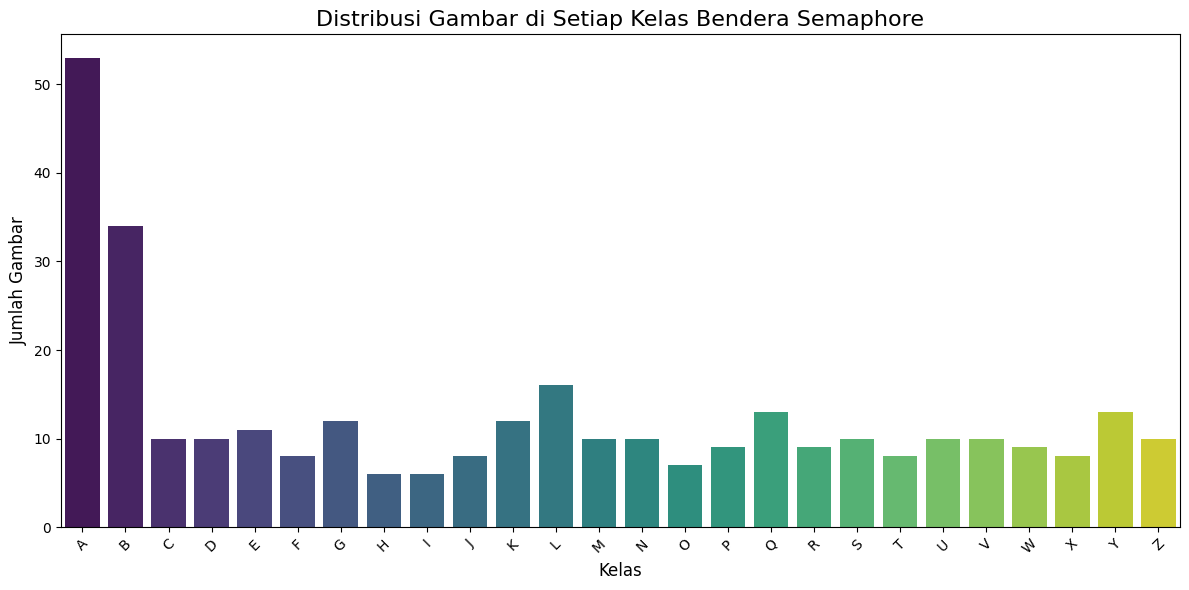

In [19]:
import seaborn as sns
import pandas as pd
import os
import matplotlib.pyplot as plt

# Mendapatkan daftar kelas dari direktori dataset, hanya menyertakan direktori
classes = sorted([cls for cls in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, cls))])

# Membuat dictionary untuk menyimpan jumlah gambar di setiap kelas
class_counts = {cls: len(os.listdir(os.path.join(dataset_path, cls))) for cls in classes}

# Mengubah dictionary menjadi DataFrame untuk visualisasi
class_counts_df = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Count'])

# Visualisasi distribusi gambar di setiap kelas menggunakan seaborn
plt.figure(figsize=(12, 6))  # Mengatur ukuran plot agar lebih besar
sns.barplot(x='Class', y='Count', data=class_counts_df, palette='viridis')

# Menambahkan judul dan memutar label x-axis agar mudah dibaca
plt.title('Distribusi Gambar di Setiap Kelas Bendera Semaphore', fontsize=16)
plt.xticks(rotation=45)  # Memutar label pada sumbu x agar tidak tumpang tindih
plt.xlabel('Kelas', fontsize=12)
plt.ylabel('Jumlah Gambar', fontsize=12)

# Menampilkan plot
plt.tight_layout()
plt.show()


In [20]:
from tensorflow.keras import models, layers

def build_alexnet(input_shape=(224, 224, 3), num_classes=26):
    model = models.Sequential()

    # 1st Conv Layer
    model.add(layers.Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((3, 3), strides=2))

    # 2nd Conv Layer
    model.add(layers.Conv2D(256, (5, 5), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((3, 3), strides=2))

    # 3rd Conv Layer
    model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))

    # 4th Conv Layer
    model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))

    # 5th Conv Layer
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((3, 3), strides=2))

    # Flatenning
    model.add(layers.Flatten())

    # Fully Connected Layers
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))

    # Output layer with 26 classes (for A-Z semaphore signals)
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model


In [22]:
# Compile AlexNet
alexnet = build_alexnet()
alexnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
# Compile VGG16
vgg16 = build_vgg16()
vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
# Train AlexNet
history_alexnet = alexnet.fit(train_generator, validation_data=val_generator, epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 147s 3s/step - accuracy: 0.0723 - loss: 20.2174 - val_accuracy: 0.1818 - val_loss: 3.1691
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 66s 168ms/step - accuracy: 0.1658 - loss: 3.0374 - val_accuracy: 0.1818 - val_loss: 3.1670
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 166ms/step - accuracy: 0.2029 - loss: 2.7861 - val_accuracy: 0.1818 - val_loss: 3.2699
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 170ms/step - accuracy: 0.2059 - loss: 2.7306 - val_accuracy: 0.1818 - val_loss: 7.2448
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 146ms/step - accuracy: 0.1788 - loss: 2.7942 - val_accuracy: 0.1818 - val_loss: 10.5276
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - accuracy: 0.1744 - loss: 2.7948 - val_accuracy: 0.1818 - val_loss: 10.2052
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - accuracy: 0.2059 - loss: 2.7631 - val_accuracy: 0.1818 - val_loss: 7.7215
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 193ms/step - accuracy: 0.1870 - loss: 2.6438 - val_accuracy: 0.1818 - val_loss: 10.72

In [25]:
# Train VGG16
history_vgg16 = vgg16.fit(train_generator, validation_data=val_generator, epochs=10)

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 94s 6s/step - accuracy: 0.0666 - loss: 10.8838 - val_accuracy: 0.1818 - val_loss: 3.0497
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 63s 527ms/step - accuracy: 0.1348 - loss: 3.2594 - val_accuracy: 0.1818 - val_loss: 3.1398
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 500ms/step - accuracy: 0.1100 - loss: 3.2017 - val_accuracy: 0.1091 - val_loss: 3.1505
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 517ms/step - accuracy: 0.1068 - loss: 3.1570 - val_accuracy: 0.1818 - val_loss: 3.0354
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 486ms/step - accuracy: 0.1397 - loss: 3.0887 - val_accuracy: 0.1818 - val_loss: 3.0542
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 493ms/step - accuracy: 0.1494 - loss: 3.1306 - val_accuracy: 0.1818 - val_loss: 3.0318
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 498ms/step - accuracy: 0.1424 - loss: 3.1047 - val_accuracy: 0.1818 - val_loss: 3.0330
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 549ms/step - accuracy: 0.2033 - loss: 3.0028 - val_accuracy: 0.1818 - val_lo

In [26]:
import matplotlib.pyplot as plt

def plot_history(history, model_name):
    # Plot akurasi
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
    plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
    plt.title(f'Akurasi Model {model_name}')
    plt.xlabel('Epoch')
    plt.ylabel('Akurasi')
    plt.legend()

    # Plot kehilangan (loss)
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Kehilangan Pelatihan')
    plt.plot(history.history['val_loss'], label='Kehilangan Validasi')
    plt.title(f'Kehilangan Model {model_name}')
    plt.xlabel('Epoch')
    plt.ylabel('Kehilangan')
    plt.legend()

    plt.tight_layout()
    plt.show()


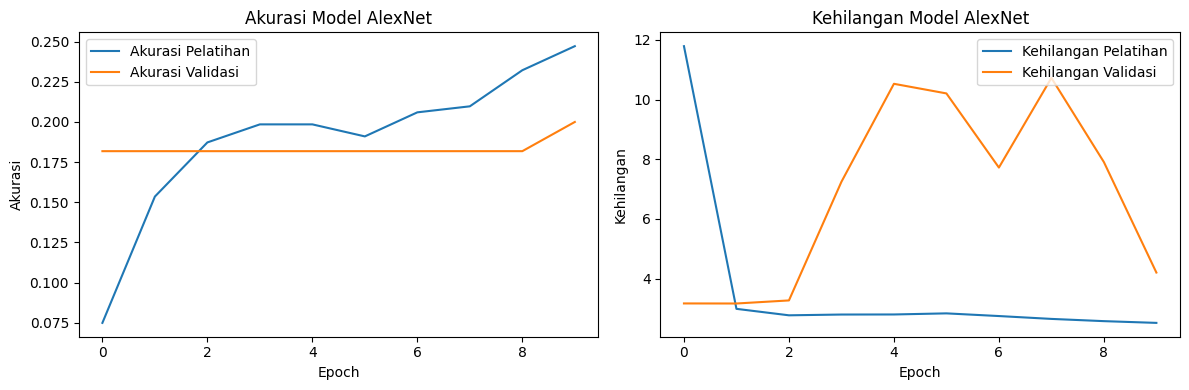

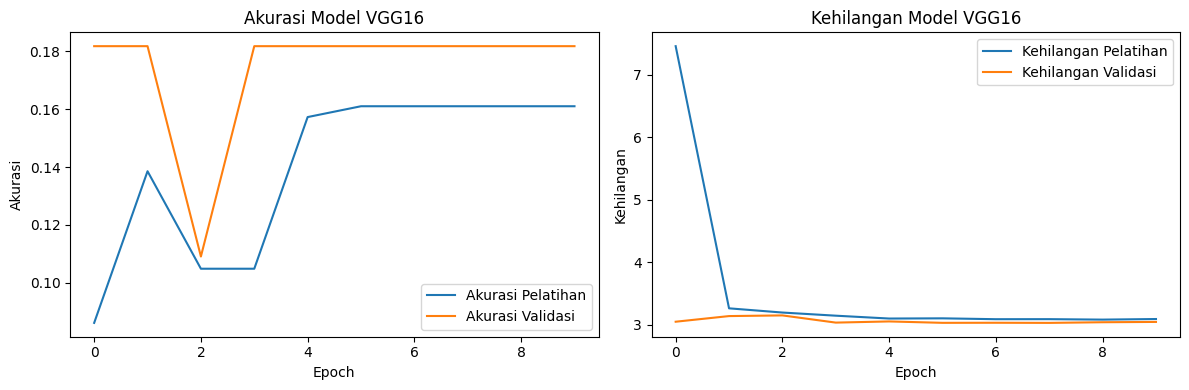

In [27]:
# Menampilkan plot untuk AlexNet
plot_history(history_alexnet, 'AlexNet')

# Menampilkan plot untuk VGG16
plot_history(history_vgg16, 'VGG16')


In [28]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get predictions for both models
val_preds_alexnet = alexnet.predict(val_generator)
val_preds_vgg16 = vgg16.predict(val_generator)

# Get true labels and predicted labels
val_true_labels = val_generator.labels
val_pred_labels_alexnet = np.argmax(val_preds_alexnet, axis=1)
val_pred_labels_vgg16 = np.argmax(val_preds_vgg16, axis=1)

# Confusion matrix and Miss Classification Rate for AlexNet
cm_alexnet = confusion_matrix(val_true_labels, val_pred_labels_alexnet)
print("Confusion Matrix AlexNet:", cm_alexnet)

# Confusion matrix and Miss Classification Rate for VGG16
cm_vgg16 = confusion_matrix(val_true_labels, val_pred_labels_vgg16)
print("Confusion Matrix VGG16:", cm_vgg16)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 416ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 488ms/step
Confusion Matrix AlexNet: [[10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 5  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

In [29]:
# Miss Classification Rate function
def calculate_miss_classification_rate(confusion_matrix):
    total_samples = np.sum(confusion_matrix)
    total_misclassified = total_samples - np.trace(confusion_matrix)
    mcr = total_misclassified / total_samples
    return mcr

# Calculate Miss Classification Rate for both models
mcr_alexnet = calculate_miss_classification_rate(cm_alexnet)
mcr_vgg16 = calculate_miss_classification_rate(cm_vgg16)
print(f"Miss Classification Rate AlexNet: {mcr_alexnet:.2f}")
print(f"Miss Classification Rate VGG16: {mcr_vgg16:.2f}")

Miss Classification Rate AlexNet: 0.80
Miss Classification Rate VGG16: 0.82


In [30]:
# Classification Report
print("Classification Report AlexNet:")
print(classification_report(val_true_labels, val_pred_labels_alexnet))

print("Classification Report VGG16:")
print(classification_report(val_true_labels, val_pred_labels_vgg16))

Classification Report AlexNet:
              precision    recall  f1-score   support

           0       0.19      1.00      0.31        10
           1       1.00      0.17      0.29         6
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


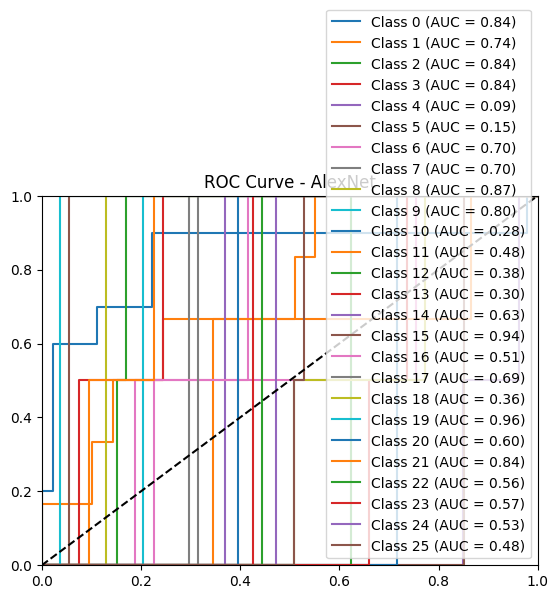

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


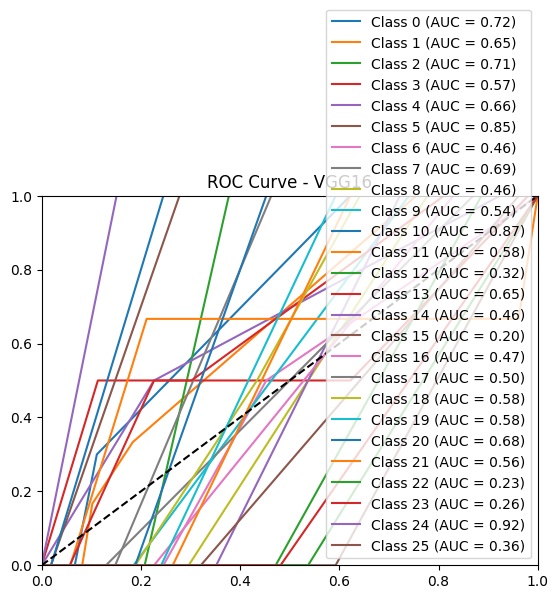

In [31]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(model, data_generator, model_name):
    predictions = model.predict(data_generator)
    n_classes = predictions.shape[1]

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(data_generator.classes == i, predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC for each class
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC for AlexNet and VGG16
plot_roc_curve(alexnet, val_generator, "AlexNet")
plot_roc_curve(vgg16, val_generator, "VGG16")


Dua gambar yang Anda berikan adalah grafik **ROC Curve** untuk dua model yang berbeda, yaitu **VGG16** dan **AlexNet**. ROC (Receiver Operating Characteristic) curve digunakan untuk mengevaluasi kinerja model klasifikasi, terutama untuk melihat seberapa baik model tersebut dapat membedakan antara kelas yang berbeda. Nilai **AUC (Area Under Curve)** adalah metrik yang dihasilkan dari ROC curve, di mana nilai AUC yang lebih tinggi menunjukkan kinerja yang lebih baik.

### Penjelasan Gambar:
1. **ROC Curve - VGG16**:
   - Terdapat 26 kelas yang ditampilkan, dengan AUC untuk masing-masing kelas berkisar antara **0.20 hingga 0.92**.
   - Beberapa kelas menunjukkan performa yang baik, misalnya **Class 5 (AUC = 0.85)** dan **Class 24 (AUC = 0.92)**, yang memiliki nilai AUC tinggi.
   - Ada beberapa kelas dengan AUC rendah seperti **Class 12 (AUC = 0.32)** dan **Class 15 (AUC = 0.20)**, yang menunjukkan bahwa model kesulitan membedakan kelas-kelas ini.

2. **ROC Curve - AlexNet**:
   - Sama seperti VGG16, AlexNet juga memiliki 26 kelas, dengan AUC yang berkisar dari **0.09 hingga 0.96**.
   - Model ini menunjukkan kinerja yang lebih baik pada beberapa kelas, seperti **Class 19 (AUC = 0.96)** dan **Class 24 (AUC = 0.94)**.
   - Namun, ada juga kelas dengan AUC yang rendah, seperti **Class 4 (AUC = 0.09)** dan **Class 13 (AUC = 0.30)**.

### Perbandingan Model:
- **VGG16** Nilai AUC berkisar antara 0.20 hingga 0.92.
Kelas dengan AUC tertinggi: Class 24 (AUC = 0.92).
Kelas dengan AUC terendah: Class 15 (AUC = 0.20).                              
  memiliki AUC yang cukup bervariasi, dengan beberapa kelas menunjukkan performa yang baik namun ada juga yang rendah.
- **AlexNet** Nilai AUC berkisar antara 0.09 hingga 0.96.
Kelas dengan AUC tertinggi: Class 19 (AUC = 0.96).
Kelas dengan AUC terendah: Class 4 (AUC = 0.09).                             
  cenderung memiliki AUC yang lebih tinggi secara keseluruhan dibandingkan VGG16, terutama pada beberapa kelas kunci (seperti Class 19 dan Class 24).

### Kesimpulan:
- Dari kedua model ini, **AlexNet** menunjukkan performa yang lebih baik secara umum karena memiliki nilai AUC yang lebih tinggi di beberapa kelas penting, yang berarti model ini lebih efektif dalam membedakan antara beberapa kelas.
- **AlexNet** juga memiliki beberapa kelas dengan AUC yang sangat rendah, tetapi kinerja di kelas-kelas dengan AUC tinggi cukup kuat untuk menjadikannya pilihan yang lebih baik dibandingkan dengan VGG16 dalam skenario ini.

Oleh karena itu, jika tujuan Anda adalah untuk memaksimalkan kemampuan klasifikasi pada beberapa kelas yang penting, **AlexNet** tampaknya lebih unggul dibandingkan **VGG16**.